<a href="https://colab.research.google.com/github/LatiefDataVisionary/eda-college-task/blob/main/Tugas_EDA_week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas EDA Pertemuan 8: Membuat Grafik Multivariat

Nama Kelompok:
-  
-

Judul Dataset: **Diamonds** (Analyze diamonds by their cut, color, clarity, price, and other attributes).

Link Dataset: https://www.kaggle.com/datasets/shivam2503/diamonds/data



### **1. Mengimpor Library yang diperlukan**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### **2. Unggah file dari lokal ke Colab**


In [ ]:
from google.colab import files

# Unggah file "diamonds.csv"
uploaded = files.upload()

Saving diamonds_dirty.csv to diamonds_dirty.csv


### **3. Baca dataset**

In [ ]:
# File akan tersimpan dengan nama asli, misalnya "diamonds.csv"
df = pd.read_csv('diamonds_dirty.csv')

### **4. Lihat ringkasan data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  48514 non-null  float64
 1   carat       48542 non-null  float64
 2   cut         48543 non-null  object 
 3   color       48621 non-null  object 
 4   clarity     48333 non-null  object 
 5   depth       48515 non-null  float64
 6   table       48637 non-null  float64
 7   price       48563 non-null  float64
 8   x           48607 non-null  float64
 9   y           48539 non-null  float64
 10  z           48556 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.5+ MB


### **Penjelasan Ouput:**
1. **Jumlah Data**: Dataset memiliki 53.940 baris (entri) dan 11 kolom.
    *   Dataset memiliki 53.940 baris, diberi penomoran dari 0 hingga 53.939.
    *   Data Columns Dataset terdiri dari 11 kolom, di mana: 8 kolom bertipe float64 (angka desimal). 3 kolom bertipe object (string/kategorikal).

2. **Non-Null Count** : Setiap kolom memiliki jumlah non-null (data tidak kosong) yang berbeda-beda, menunjukkan adanya missing values di beberapa kolom:
  - Kolom Unnamed: 0 memiliki 48.514 data tidak kosong, artinya 5.426 data kosong (9,98%).
  - Kolom carat memiliki 48.542 data tidak kosong, artinya 5.398 data kosong (9,94%).
  - Kolom cut memiliki 48.543 data tidak kosong, artinya 5.397 data kosong (9,94%).
  - Kolom color memiliki 48.621 data tidak kosong, artinya 5.319 data kosong (9,85%).
  - Kolom clarity memiliki 48.333 data tidak kosong, artinya 5.607 data kosong (10,39%).
  - Kolom depth memiliki 48.515 data tidak kosong, artinya 5.425 data kosong (9,98%).
  - Kolom table memiliki 48.637 data tidak kosong, artinya 5.303 data kosong (9,83%).
  - Kolom price memiliki 48.563 data tidak kosong, artinya 5.377 data kosong (9,93%).
  - Kolom x memiliki 48.607 data tidak kosong, artinya 5.333 data kosong (9,88%).
  - Kolom y memiliki 48.539 data tidak kosong, artinya 5.401 data kosong (9,94%).
  - Kolom z memiliki 48.556 data tidak kosong, artinya 5.384 data kosong (9,94%).

3. **Dtype (Tipe Data)**
  - float64 (angka desimal):
    - Kolom: Unnamed: 0, carat, depth, table, price, x, y, z.
    - Biasanya digunakan untuk representasi data numerik seperti ukuran dan harga.
  - object (kategorikal/string):
    - Kolom: cut, color, clarity.
    - Berisi data non-numerik seperti kategori atau deskripsi.


In [ ]:
df.head(200)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.0,0.23,Ideal,E,SI2,61.5,NaN,326.0,3.95,3.98,NaN
1,2.0,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,3.0,0.23,Good,E,VS1,56.9,65.0,NaN,4.05,4.07,NaN
3,4.0,0.29,Premium,I,NaN,62.4,58.0,334.0,4.20,NaN,2.63
4,5.0,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
195,196.0,0.70,Premium,E,SI1,62.7,59.0,2777.0,5.67,5.63,3.54
196,197.0,0.70,Premium,E,SI1,61.0,57.0,2777.0,5.73,5.68,3.48
197,198.0,0.70,Premium,E,NaN,61.0,58.0,2777.0,5.78,5.72,3.51
198,199.0,0.70,Ideal,E,NaN,61.4,57.0,2777.0,5.76,5.70,3.52


### **5. Buat Grafik Multivariat (Data Kotor)**

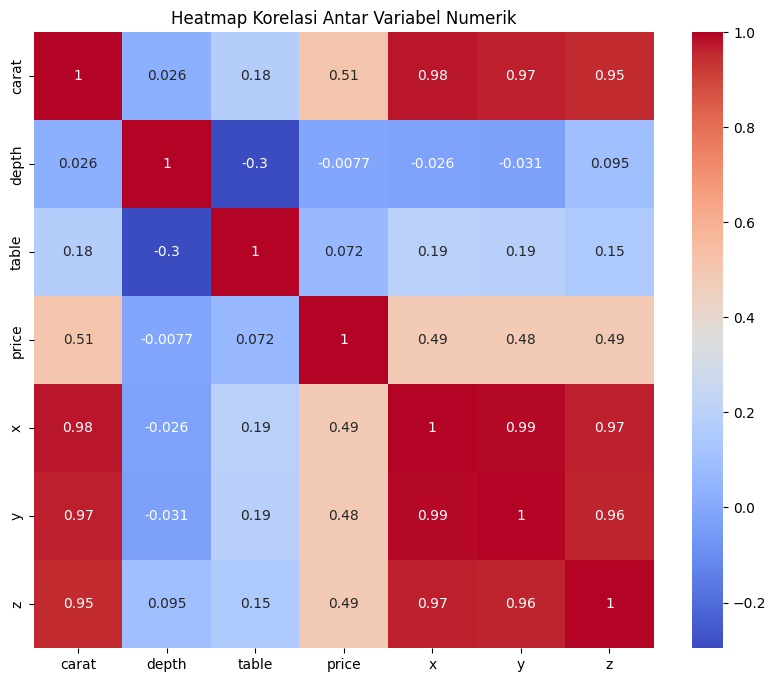

In [ ]:
# Pilih hanya kolom numerik untuk heatmap
numeric_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
correlation = df[numeric_columns].corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

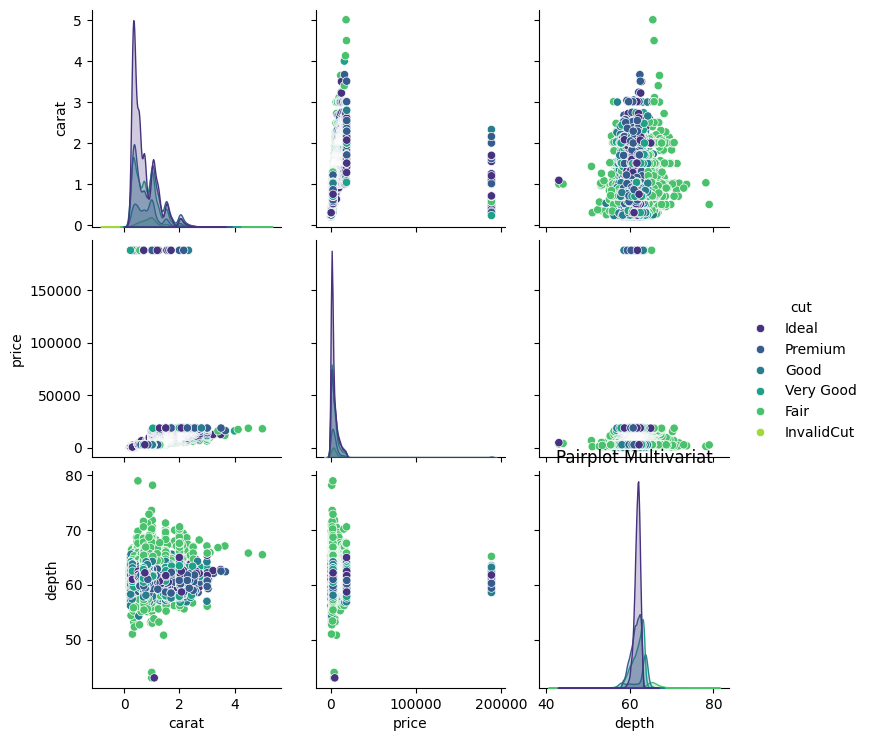

In [ ]:
# Pairplot menggunakan seaborn
sns.pairplot(df, vars=['carat', 'price', 'depth'], hue='cut', palette='viridis')
plt.title("Pairplot Multivariat")
plt.show()

ini aku ni

<ipython-input-10-2070a8ff2535>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='price', data=df, palette='Set3')


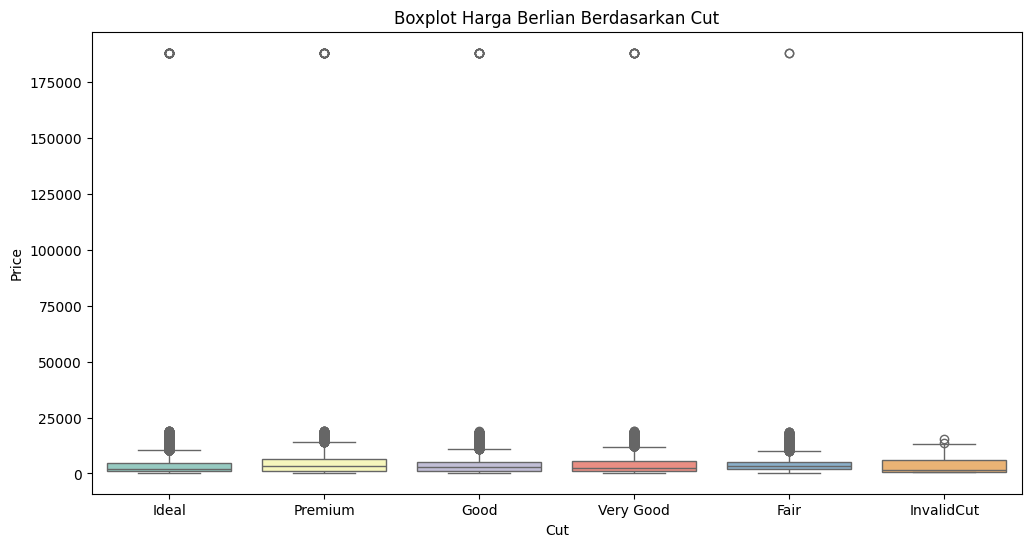

In [ ]:
# Contoh: Boxplot untuk variabel kategori vs numerik
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='price', data=df, palette='Set3')
plt.title("Boxplot Harga Berlian Berdasarkan Cut")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

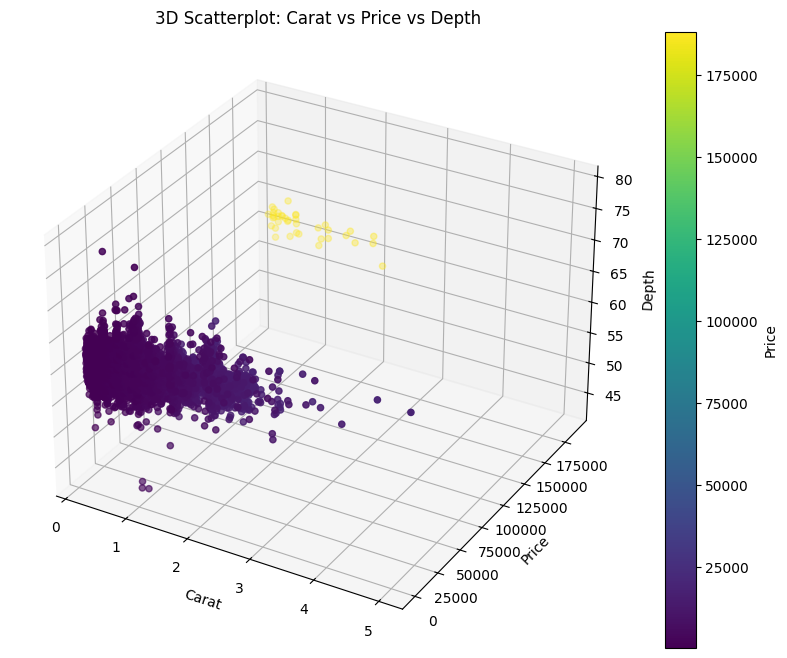

In [ ]:
# Contoh tambahan: Scatterplot 3D (opsional, butuh library tambahan)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['carat'], df['price'], df['depth'], c=df['price'], cmap='viridis')
ax.set_xlabel('Carat')
ax.set_ylabel('Price')
ax.set_zlabel('Depth')
plt.title("3D Scatterplot: Carat vs Price vs Depth")
plt.colorbar(scatter, label="Price")
plt.show()

### **6. Data cleaning**


In [ ]:
# Baca dataset kotor
df_dirty = pd.read_csv("diamonds_dirty.csv")

In [ ]:
# 1. Hapus kolom yang tidak relevan
df_clean = df_dirty.drop(columns=["Unnamed: 0"], errors="ignore")

In [ ]:
# 2. Tangani missing values
# Mengisi nilai NaN untuk kolom numerik dengan median
numerical_cols = df_clean.select_dtypes(include=["float64", "int64"]).columns
df_clean[numerical_cols] = df_clean[numerical_cols].fillna(df_clean[numerical_cols].median())

# Mengisi nilai NaN untuk kolom kategorikal dengan mode
categorical_cols = df_clean.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

In [ ]:
# 3. Tangani outliers
# Outliers pada kolom harga (price) yang terlalu tinggi (misalnya > 3 * IQR)
Q1 = df_clean["price"].quantile(0.25)
Q3 = df_clean["price"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 3 * IQR
df_clean["price"] = np.where(df_clean["price"] > upper_limit, upper_limit, df_clean["price"])

In [ ]:
# 4. Perbaiki data yang tidak valid
# Validasi kolom 'cut', 'color', dan 'clarity' dengan daftar nilai yang valid
valid_cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
valid_colors = ["D", "E", "F", "G", "H", "I", "J"]
valid_clarities = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"]

df_clean["cut"] = df_clean["cut"].where(df_clean["cut"].isin(valid_cuts), "Unknown")
df_clean["color"] = df_clean["color"].where(df_clean["color"].isin(valid_colors), "Unknown")
df_clean["clarity"] = df_clean["clarity"].where(df_clean["clarity"].isin(valid_clarities), "Unknown")

In [ ]:
# 5. Simpan hasil cleaning ke file baru
output_file_clean = "diamonds_cleaned.csv"
df_clean.to_csv(output_file_clean, index=False)

# Opsional: Unduh file hasil cleaning
from google.colab import files
files.download(output_file_clean)